In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('E:/athlete_events.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
220091,110565,Yarisley Silva Rodrguez,F,25.0,161.0,61.0,Cuba,CUB,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Pole Vault,Silver
187455,94213,Rolf Bjorger Pettersen,M,22.0,178.0,70.0,Canada,CAN,1968 Winter,1968,Winter,Grenoble,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
134163,67545,Paulette le Raer,F,28.0,156.0,53.0,France,FRA,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Women's Balance Beam,NaN
270009,135079,Irek Khaydarovich Zinnurov,M,31.0,187.0,84.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Water Polo,Water Polo Men's Water Polo,Silver
19866,10467,Tora Berger (-Tveldal),F,28.0,166.0,56.0,Norway,NOR,2010 Winter,2010,Winter,Vancouver,Biathlon,Biathlon Women's 4 x 6 kilometres Relay,NaN


In [8]:
df.shape

(271116, 15)

In [10]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [16]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Height'].fillna(df['Height'].mean(),inplace=True)
df['Weight'].fillna(df['Weight'].mean(),inplace=True)

In [17]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [21]:
df = df.drop_duplicates()

In [22]:
df.duplicated().any()

False

In [25]:
numerical_data = df.select_dtypes(include=['number'])

In [26]:
numerical_data.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002825,-0.009791,-0.008059,0.011381
Age,-0.002825,1.000000,0.111115,0.168071,-0.088250
Height,-0.009791,0.111115,1.000000,0.786635,0.030126
Weight,-0.008059,0.168071,0.786635,1.000000,0.011598
Year,0.011381,-0.088250,0.030126,0.011598,1.000000


<Axes: >

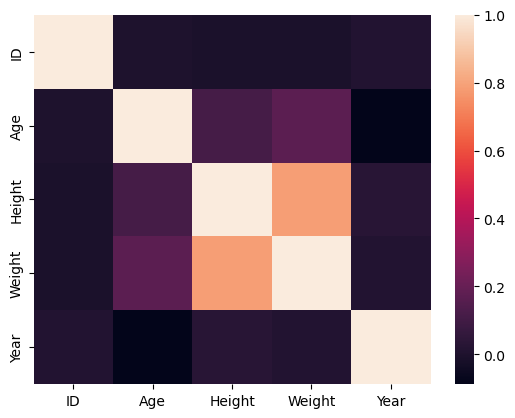

In [27]:
sns.heatmap(numerical_data.corr())

# Univaraiate Analysis

# 1. Categorical Columns
Bar plot is mostly created on the categorical data, Pie plot is also used on categorical data

In [32]:
df['Sex'].value_counts()

Sex
M    195353
F     74378
Name: count, dtype: int64

<Axes: >

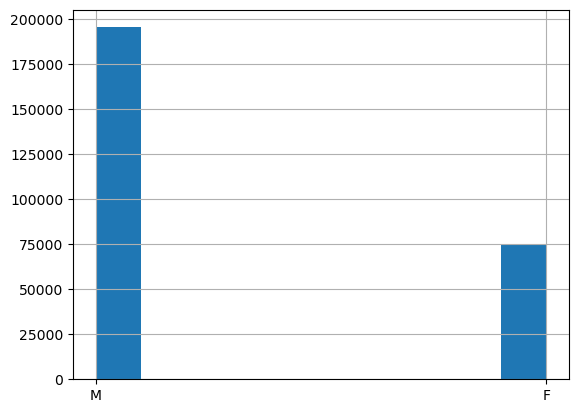

In [36]:
df['Sex'].hist()

In [47]:
top10 = df['Sport'].value_counts().head(10)
top10.values

array([38624, 26707, 23195, 11448, 10827, 10735, 10595,  9133,  8829,
        7154], dtype=int64)

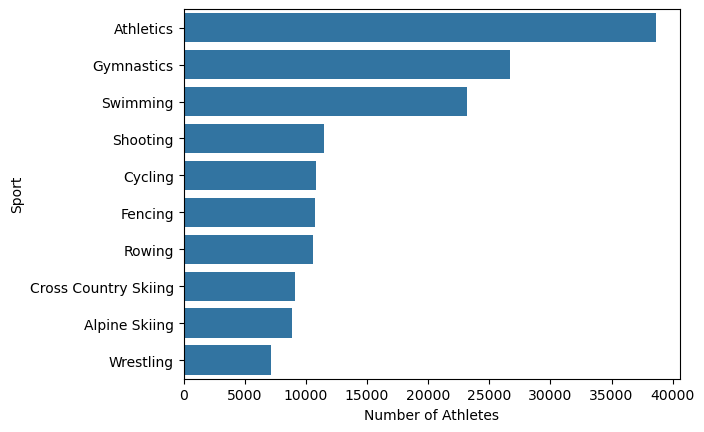

In [52]:
sns.barplot(x=top10.values,y=top10.index)
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.show()

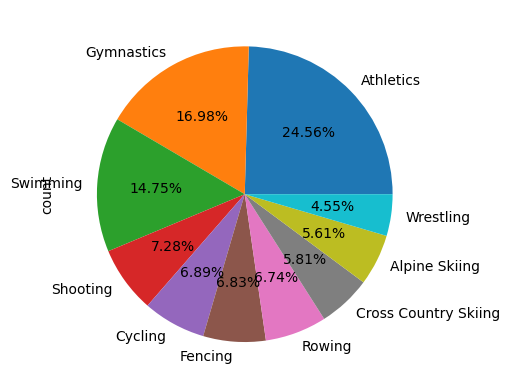

In [58]:
top10 = df['Sport'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%')

In [66]:
#idxmax returns the index of the first maximum value
df['Sport'].value_counts().idxmax()

'Athletics'

# Numerical Columns
Hist plot and box plot can be used for numerical columns

<Axes: xlabel='Age', ylabel='Count'>

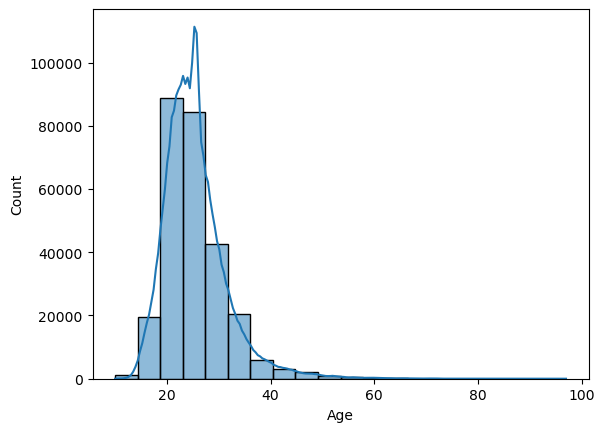

In [77]:
#kde returns the desnity of the chart
sns.histplot(df['Age'],bins=20,kde=True)

<Axes: xlabel='Age'>

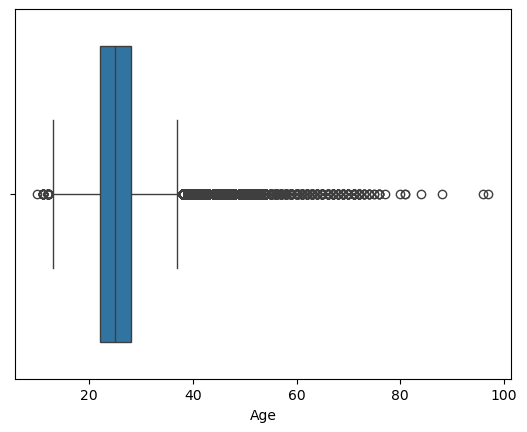

In [79]:
sns.boxplot(x=df['Age'])

In [81]:
#Right tail is longer than the left tail incase the skewness is greater than 0
df['Age'].skew()

1.5877141959478527

# Bivaraite Analysis and Multivariate Analysis

1. Numerical-Numerical Relationships
We can create scatter plot in these cases

In [107]:
abc = df[df['Team'] == 'Pakistan']

In [119]:
medals = abc.groupby('Year')['Medal'].count()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1948'),
  Text(1, 0, '1952'),
  Text(2, 0, '1956'),
  Text(3, 0, '1960'),
  Text(4, 0, '1964'),
  Text(5, 0, '1968'),
  Text(6, 0, '1972'),
  Text(7, 0, '1976'),
  Text(8, 0, '1984'),
  Text(9, 0, '1988'),
  Text(10, 0, '1992'),
  Text(11, 0, '1996'),
  Text(12, 0, '2000'),
  Text(13, 0, '2004'),
  Text(14, 0, '2008'),
  Text(15, 0, '2010'),
  Text(16, 0, '2012'),
  Text(17, 0, '2014'),
  Text(18, 0, '2016')])

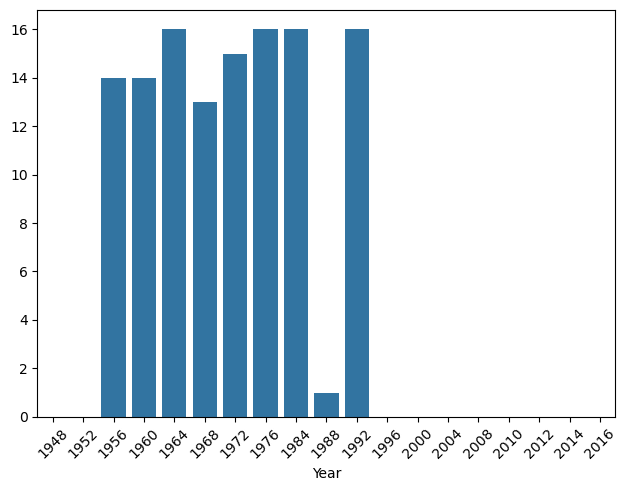

In [131]:
sns.barplot(x=medals.index,y=medals.values)
plt.tight_layout()
plt.xticks(rotation=45)

<Axes: xlabel='Year'>

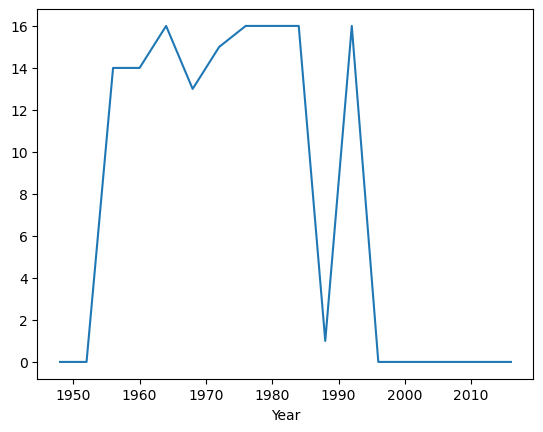

In [134]:
sns.lineplot(x=medals.index,y=medals.values)

<Axes: xlabel='Age', ylabel='Height'>

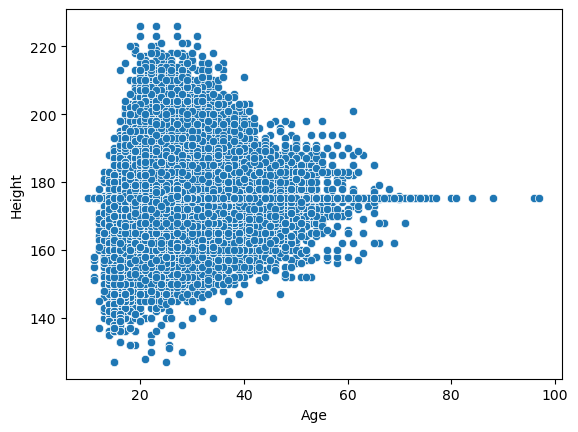

In [111]:
sns.scatterplot(x='Age',y='Height',data=df)

<Axes: xlabel='Age', ylabel='Height'>

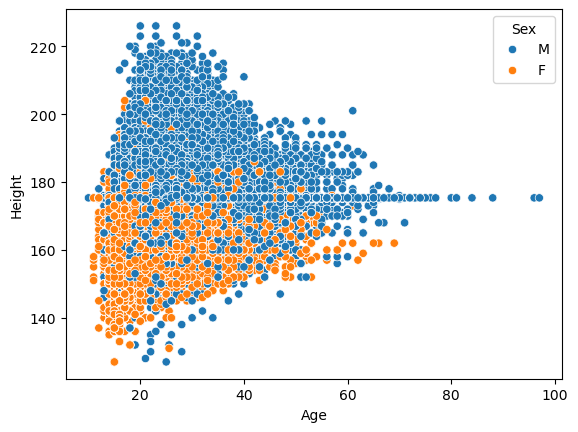

In [85]:
sns.scatterplot(x='Age',y='Height',hue='Sex',data=df)

2. Numerical-Categorical Relationships
   we can use barplot and boxplot for these cases

In [159]:
df.groupby('Name')['Medal'].count().sort_values(ascending=False)

Name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Edoardo Mangiarotti                   13
Ole Einar Bjrndalen                   13
                                      ..
Hugo Ernesto Romero Iza                0
Hugo Ernesto Perez                     0
Hugo Dufey                             0
Hugo Dionisio Chila Ayov               0
zzet nce                               0
Name: Medal, Length: 134732, dtype: int64

In [151]:
df2

3           Gold
37        Bronze
38        Bronze
40        Bronze
41        Bronze
           ...  
271078    Silver
271080    Bronze
271082    Bronze
271102    Bronze
271103    Silver
Name: Medal, Length: 39772, dtype: object

<Axes: xlabel='Medal', ylabel='Age'>

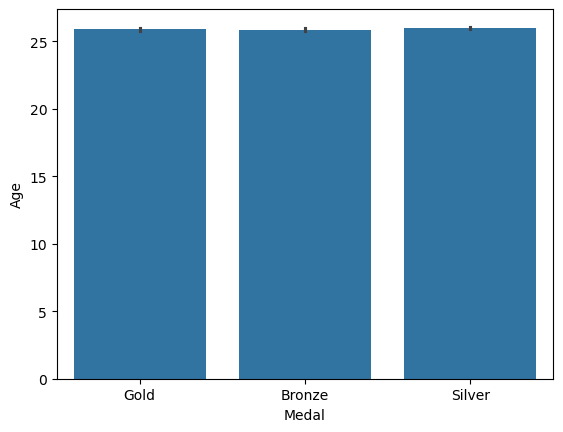

In [90]:
sns.barplot(x='Medal',y='Age',data=df)           

<Axes: xlabel='Medal', ylabel='Age'>

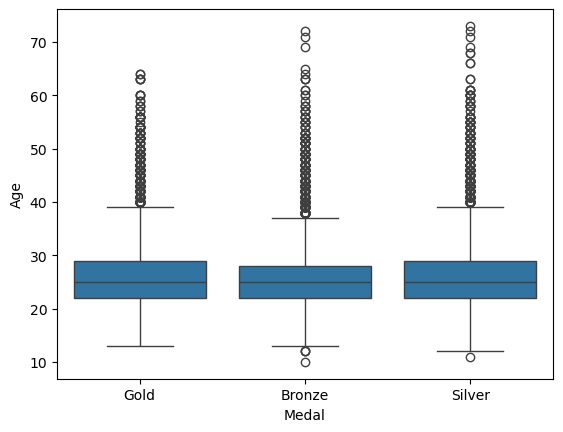

In [91]:
sns.boxplot(x='Medal',y='Age',data=df)           

<Axes: xlabel='Medal', ylabel='Age'>

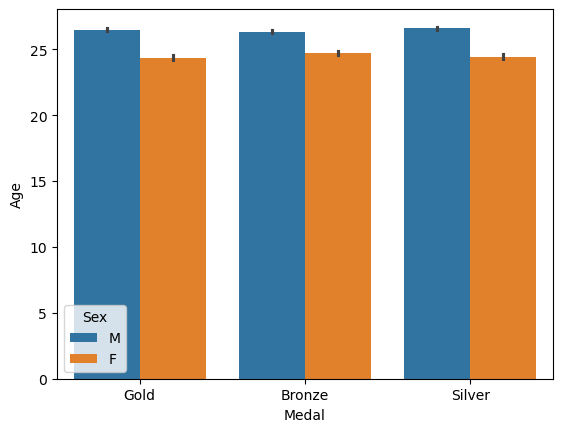

In [92]:
sns.barplot(x='Medal',y='Age',hue='Sex',data=df)           

<Axes: xlabel='Medal', ylabel='Age'>

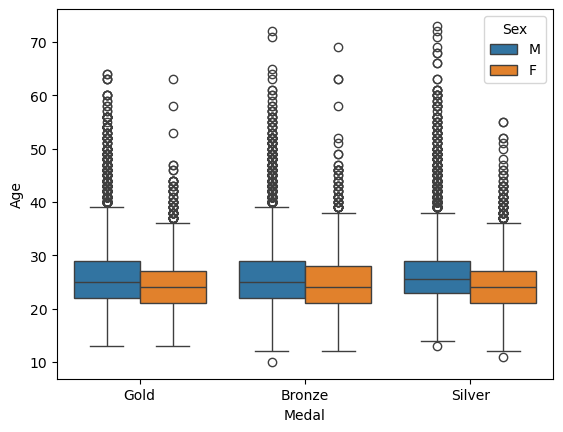

In [93]:
sns.boxplot(x='Medal',y='Age',hue='Sex',data=df)           

3. Categorical - Categorical Relationships

In [95]:
con = pd.crosstab(df['Sex'],df['Medal'])

<Axes: xlabel='Medal', ylabel='Sex'>

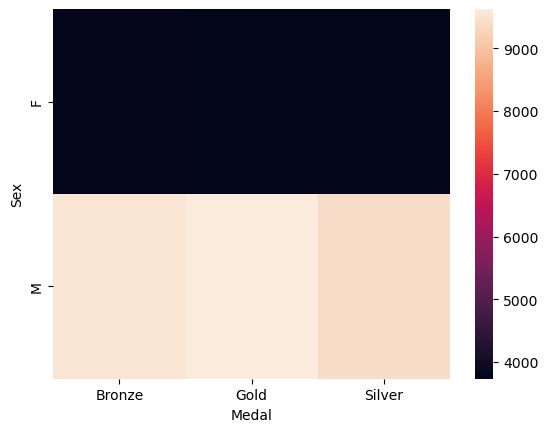

In [96]:
sns.heatmap(con)

<Axes: xlabel='Medal', ylabel='City'>

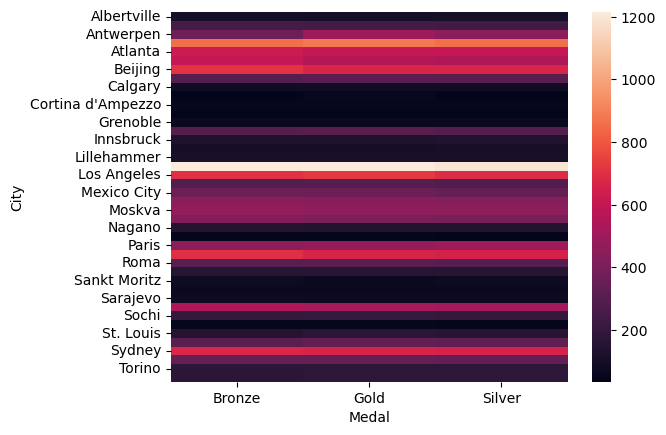

In [170]:
sns.heatmap(df.groupby(['City','Medal']).size().unstack())

In [203]:
df_medals = df.groupby('City')['Medal'].value_counts().unstack().reset_index()

In [217]:
df_medals['Total'] = df_medals[['Bronze','Silver','Gold']].sum(axis=1)

In [224]:
df_medals = df_medals.sort_values(by='Total',ascending=False)

In [225]:
df_medals

Medal,index,City,Bronze,Gold,Silver,Total
0,17,London,1214,1215,1195,3624
1,3,Athina,860,883,859,2602
2,18,Los Angeles,706,726,691,2123
3,6,Beijing,710,671,667,2048
4,27,Rio de Janeiro,703,665,655,2023
5,38,Sydney,680,663,661,2004
6,4,Atlanta,629,608,605,1842
7,5,Barcelona,604,559,549,1712
8,33,Seoul,549,520,513,1582
9,26,Paris,449,475,501,1425


KeyError: 'medals'